In [1]:
import torch
import torchaudio
import IPython.display as ipd
import librosa
import numpy as np
import torchaudio
import matplotlib.pyplot as plt
import scipy
from scipy import signal
from scipy.signal import get_window
import librosa.display

/home/bryanleow/FYP/lib/python3.7/site-packages/torchaudio/backend/utils.py:54: UserWarning: "sox" backend is being deprecated. The default backend will be changed to "sox_io" backend in 0.8.0 and "sox" backend will be removed in 0.9.0. Please migrate to "sox_io" backend. Please refer to https://github.com/pytorch/audio/issues/903 for the detail.
  '"sox" backend is being deprecated. '


## Original waveform

In [2]:
audio_path = './Dataset/ravdess1130.wav'
ipd.Audio(audio_path)

In [3]:
torch_waveform, torch_sr = torchaudio.load(audio_path)
print(torch_waveform.type())
print("Sampling rate:", torch_sr)

torch.FloatTensor
Sampling rate: 44100


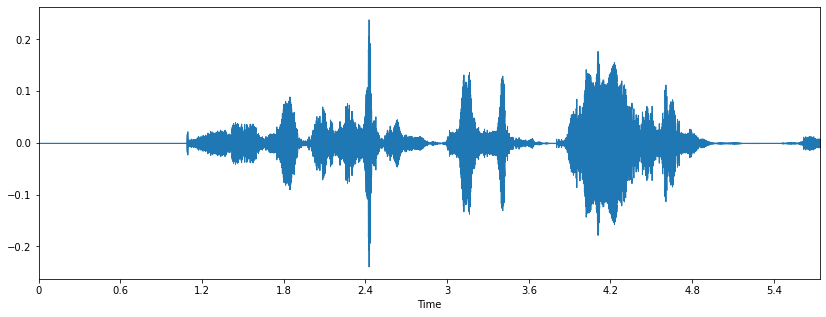

In [4]:
signal, _ = librosa.load(audio_path,sr=torch_sr)
# print(signal.dtype)
plt.figure(figsize=(14, 5))

librosa.display.waveplot(signal, sr=torch_sr);

In [5]:
ipd.Audio(signal, rate= torch_sr)

(253053,)
(1025, 495)
(1025, 495)


/home/bryanleow/FYP/lib/python3.7/site-packages/librosa/display.py:974: MatplotlibDeprecationWarning: The 'basey' parameter of __init__() has been renamed 'base' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  scaler(mode, **kwargs)
/home/bryanleow/FYP/lib/python3.7/site-packages/librosa/display.py:974: MatplotlibDeprecationWarning: The 'linthreshy' parameter of __init__() has been renamed 'linthresh' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  scaler(mode, **kwargs)
/home/bryanleow/FYP/lib/python3.7/site-packages/librosa/display.py:974: MatplotlibDeprecationWarning: The 'linscaley' parameter of __init__() has been renamed 'linscale' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  scaler(mode, **kwargs)


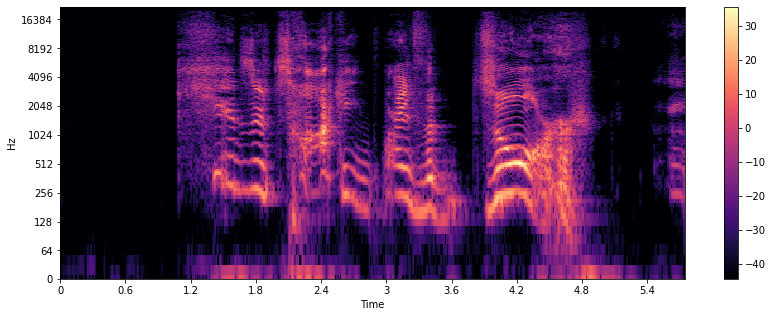

In [6]:
#display Spectrogram
print(signal.shape)
X = librosa.stft(signal) #nfft = 2048, hop_length = 512
print(X.shape)
X = librosa.amplitude_to_db(abs(X))
print(X.shape)
plt.figure(figsize=(14, 5))
# librosa.display.specshow(Xdb, sr=torch_sr, x_axis='time', y_axis='hz')
# If to pring log of frequencies  
librosa.display.specshow(X, sr=torch_sr, x_axis='time', y_axis='log')
plt.colorbar()

/home/bryanleow/FYP/lib/python3.7/site-packages/librosa/display.py:974: MatplotlibDeprecationWarning: The 'basey' parameter of __init__() has been renamed 'base' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  scaler(mode, **kwargs)
/home/bryanleow/FYP/lib/python3.7/site-packages/librosa/display.py:974: MatplotlibDeprecationWarning: The 'linthreshy' parameter of __init__() has been renamed 'linthresh' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  scaler(mode, **kwargs)


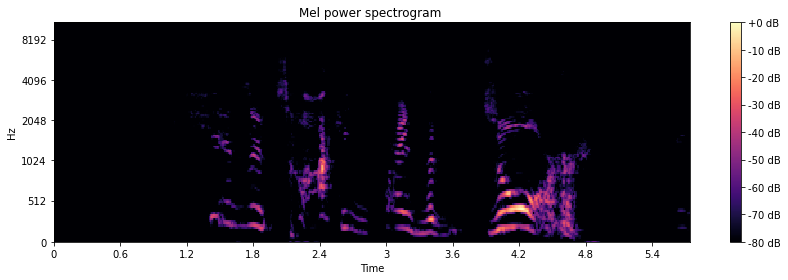

In [7]:
# Plotting Mel Power Spectrogram
S_sample = librosa.feature.melspectrogram(signal, sr=torch_sr, n_mels=128,n_fft=2048,hop_length=512)

# Convert to log scale (dB). We'll use the peak power (max) as reference.
log_S_sample = librosa.amplitude_to_db(S_sample, ref=np.max)

plt.figure(figsize=(12, 4))
librosa.display.specshow(log_S_sample, sr=torch_sr, x_axis='time', y_axis='mel')
plt.title('Mel power spectrogram ')
plt.colorbar(format='%+02.0f dB')
plt.tight_layout()

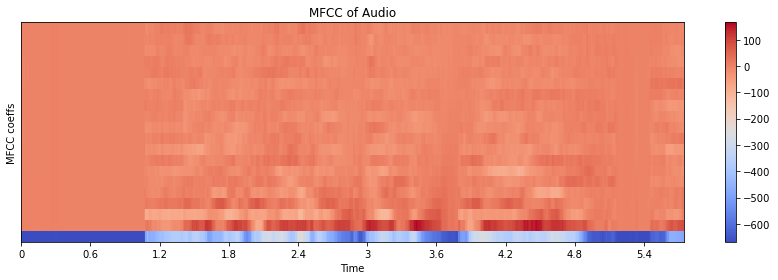

In [8]:
mfccs = librosa.feature.mfcc(signal, n_mfcc=20, n_mels=128, sr=torch_sr, n_fft=2048, hop_length= 512)

plt.figure(figsize=(12, 4))
librosa.display.specshow(mfccs, sr=torch_sr, x_axis='time')
plt.ylabel('MFCC coeffs')
plt.xlabel('Time')
plt.title('MFCC of Audio')
plt.colorbar()
plt.tight_layout()

## Trimmed waveform

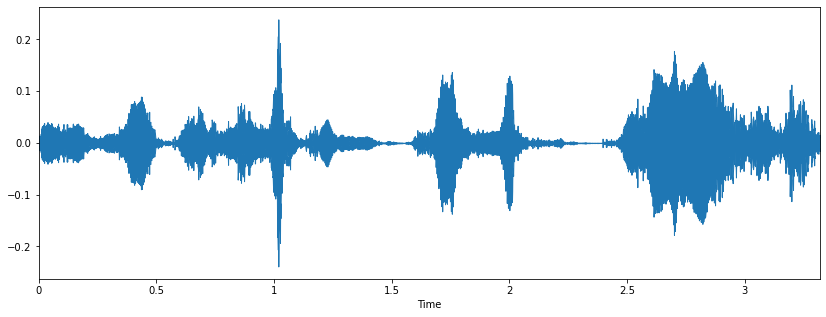

In [9]:
trimmed_signal,index = librosa.effects.trim(signal,top_db = 20)
plt.figure(figsize=(14, 5))
librosa.display.waveplot(trimmed_signal, sr=torch_sr)

In [10]:
ipd.Audio(trimmed_signal, rate= torch_sr)

(253053,)
(1025, 287)
(1025, 287)


/home/bryanleow/FYP/lib/python3.7/site-packages/librosa/display.py:974: MatplotlibDeprecationWarning: The 'basey' parameter of __init__() has been renamed 'base' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  scaler(mode, **kwargs)
/home/bryanleow/FYP/lib/python3.7/site-packages/librosa/display.py:974: MatplotlibDeprecationWarning: The 'linthreshy' parameter of __init__() has been renamed 'linthresh' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  scaler(mode, **kwargs)
/home/bryanleow/FYP/lib/python3.7/site-packages/librosa/display.py:974: MatplotlibDeprecationWarning: The 'linscaley' parameter of __init__() has been renamed 'linscale' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  scaler(mode, **kwargs)


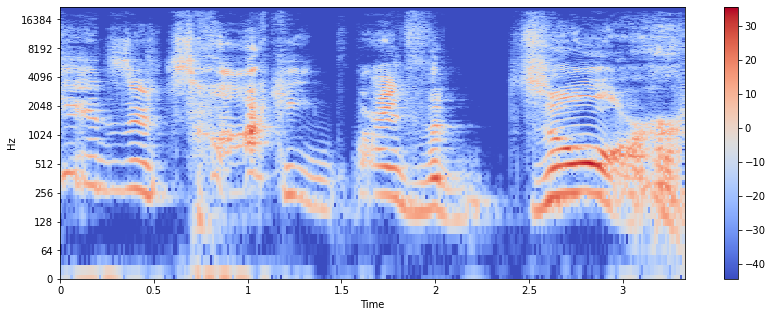

In [11]:
#display Spectrogram
print(signal.shape)
X = librosa.stft(trimmed_signal) #nfft = 2048, hop_length = 512
print(X.shape)
X = librosa.amplitude_to_db(abs(X))
print(X.shape)
plt.figure(figsize=(14, 5))
# librosa.display.specshow(Xdb, sr=torch_sr, x_axis='time', y_axis='hz')
# If to pring log of frequencies  
librosa.display.specshow(X, sr=torch_sr, x_axis='time', y_axis='log')
plt.colorbar()

/home/bryanleow/FYP/lib/python3.7/site-packages/librosa/display.py:974: MatplotlibDeprecationWarning: The 'basey' parameter of __init__() has been renamed 'base' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  scaler(mode, **kwargs)
/home/bryanleow/FYP/lib/python3.7/site-packages/librosa/display.py:974: MatplotlibDeprecationWarning: The 'linthreshy' parameter of __init__() has been renamed 'linthresh' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  scaler(mode, **kwargs)


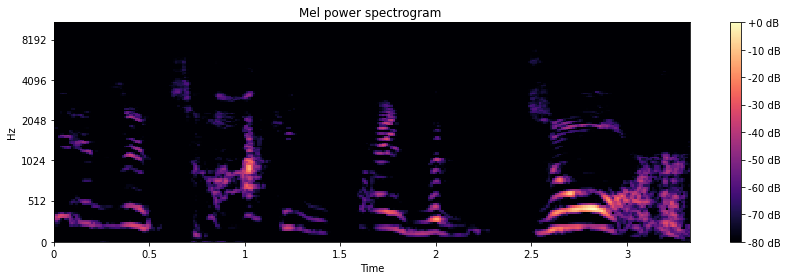

In [12]:
# Plotting Mel Power Spectrogram
S_sample = librosa.feature.melspectrogram(trimmed_signal, sr=torch_sr, n_mels=128,n_fft=2048,hop_length=512)

# Convert to log scale (dB). We'll use the peak power (max) as reference.
log_S_sample = librosa.amplitude_to_db(S_sample, ref=np.max)

plt.figure(figsize=(12, 4))
librosa.display.specshow(log_S_sample, sr=torch_sr, x_axis='time', y_axis='mel')
plt.title('Mel power spectrogram ')
plt.colorbar(format='%+02.0f dB')
plt.tight_layout()

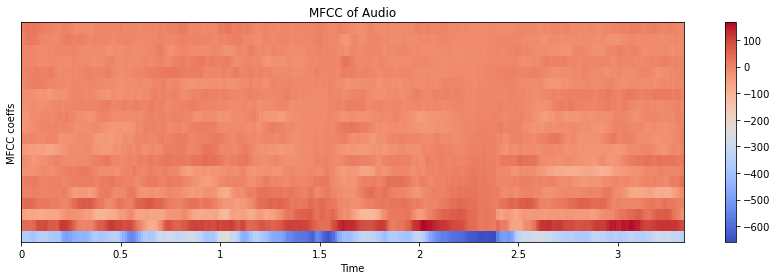

In [13]:
mfccs = librosa.feature.mfcc(trimmed_signal, n_mfcc=20, n_mels=128, sr=torch_sr, n_fft=2048, hop_length= 512)

plt.figure(figsize=(12, 4))
librosa.display.specshow(mfccs, sr=torch_sr, x_axis='time')
plt.ylabel('MFCC coeffs')
plt.xlabel('Time')
plt.title('MFCC of Audio')
plt.colorbar()
plt.tight_layout()

## Applying Wiener filter

/home/bryanleow/FYP/lib/python3.7/site-packages/scipy/signal/signaltools.py:1475: RuntimeWarning: divide by zero encountered in true_divide
  res *= (1 - noise / lVar)
/home/bryanleow/FYP/lib/python3.7/site-packages/scipy/signal/signaltools.py:1475: RuntimeWarning: invalid value encountered in multiply
  res *= (1 - noise / lVar)


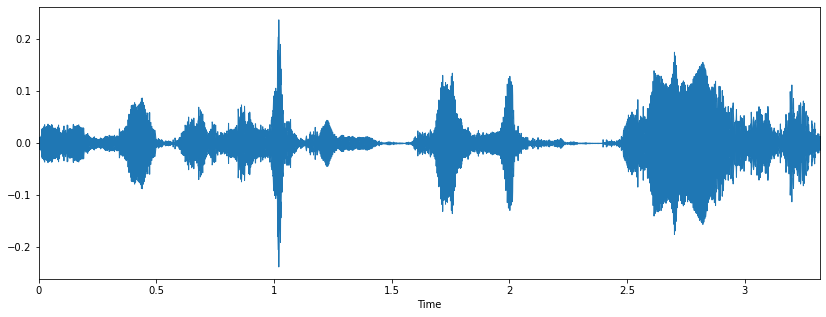

In [14]:
signal_wiener = scipy.signal.wiener(trimmed_signal)
plt.figure(figsize=(14, 5))
librosa.display.waveplot(signal_wiener, sr=torch_sr)


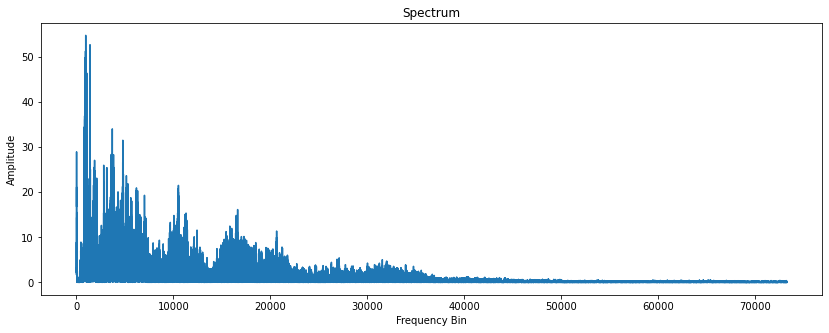

In [15]:
# Assume frame size = length of the signal 
n_fft = len(signal_wiener)
ft = np.abs(librosa.stft(signal_wiener[:], n_fft = n_fft, hop_length = n_fft+1))

plt.figure(figsize=(14, 5))
plt.title('Spectrum')
plt.xlabel('Frequency Bin');
plt.ylabel('Amplitude');
plt.plot(ft);

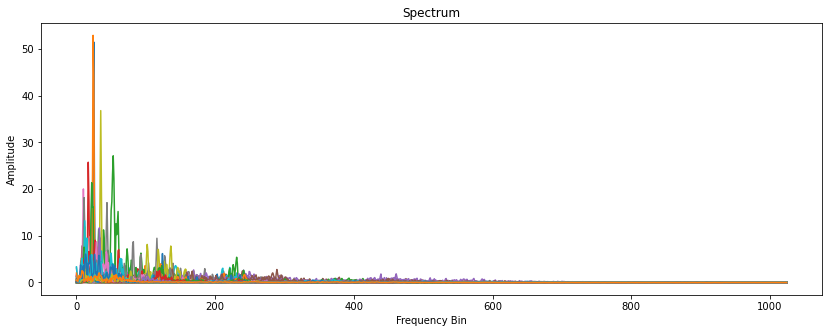

In [16]:
# Assume frame size = 2048 and there is no overlapping of frame 
n_fft = 2048
ft = np.abs(librosa.stft(signal_wiener[:], n_fft = n_fft, hop_length = n_fft+1))

plt.figure(figsize=(14, 5))
plt.title('Spectrum')
plt.xlabel('Frequency Bin');
plt.ylabel('Amplitude');
plt.plot(ft);

In [17]:
no_frames = len(signal_wiener)//n_fft + 1
print("Total number of frames:{}".format(no_frames))
print("Shape of array after STFT: {}".format(ft.shape))

Total number of frames:72
Shape of array after STFT: (1025, 72)


In [18]:
def plot_audio_frame(frame_i, n_fft):
    plt.figure(figsize=(14, 5))
    plt.title('Waveform at frame {}'.format(frame_i))
    plt.plot(signal_wiener[frame_i* n_fft: (frame_i+1)* n_fft])

In [19]:
def plot_spectrum(frame_i, n_fft):
    ft = np.abs(librosa.stft(signal_wiener[frame_i* n_fft: (frame_i+1)* n_fft], n_fft = n_fft, hop_length = n_fft+1))
    plt.figure(figsize=(14, 5))
    plt.title('Spectrum at frame {}'.format(frame_i))
    plt.xlabel('Frequency Bin');
    plt.ylabel('Amplitude');
    plt.plot(ft);

In [20]:
def plot_audio_frame_n_spectrum(frame_i, n_fft):
    plot_audio_frame(frame_i, n_fft)
    plot_spectrum(frame_i, n_fft)

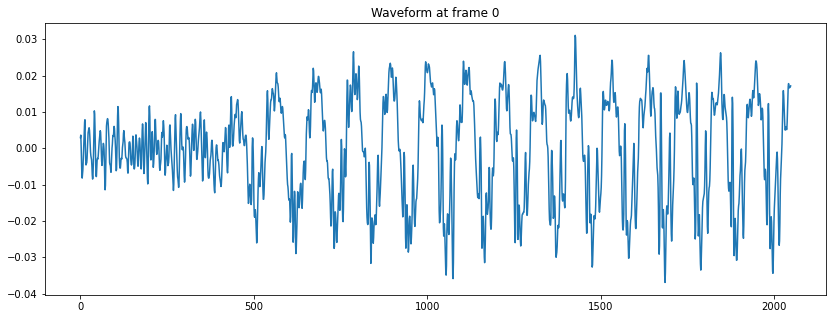

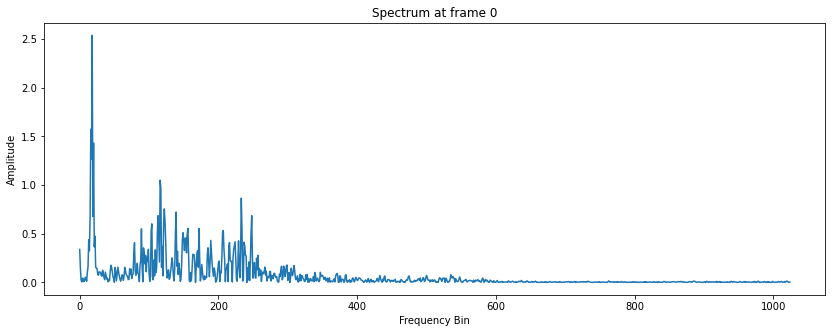

In [21]:
plot_audio_frame_n_spectrum(frame_i = 0,n_fft= 2048)

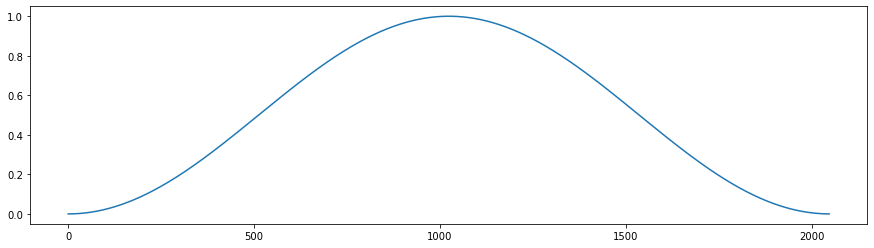

In [22]:
FFT_size = 2048
window = get_window("hann", FFT_size, fftbins=True)
plt.figure(figsize=(15,4))
plt.plot(window);

In [23]:
def plot_hann_audio_frame(frame_i, n_fft):
    plt.figure(figsize=(14, 5))
    plt.title('Waveform at frame {} after applying Hann Window'.format(frame_i))
    plt.plot(signal_wiener[frame_i* n_fft: (frame_i+1)* n_fft]*window)
    
def plot_hann_spectrum(frame_i, n_fft):
    ft = np.abs(librosa.stft(signal_wiener[frame_i* n_fft: (frame_i+1)* n_fft]*window, n_fft = n_fft, hop_length = n_fft+1))
    plt.figure(figsize=(14, 5))
    plt.title('Spectrum at frame {} after applying Hann Window'.format(frame_i))
    plt.xlabel('Frequency Bin');
    plt.ylabel('Amplitude');
    plt.plot(ft);
    
def plot_hann_audio_frame_n_spectrum(frame_i, n_fft):
    plot_hann_audio_frame(frame_i, n_fft)
    plot_hann_spectrum(frame_i, n_fft)

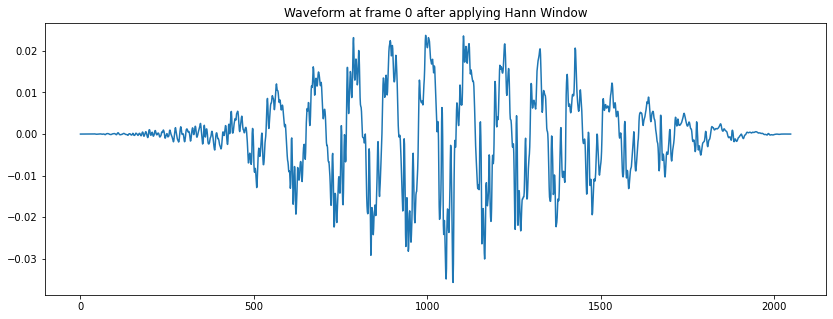

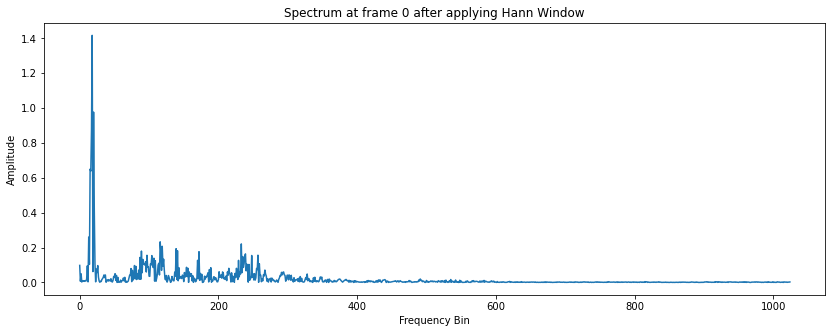

In [24]:
plot_hann_audio_frame_n_spectrum(0,2048)
# plot_hann_audio_frame_n_spectrum(1,2048)
# plot_hann_audio_frame_n_spectrum(2,2048)

In [25]:
ipd.Audio(signal_wiener, rate= torch_sr)

(253053,)
(1025, 287)
(1025, 287)


/home/bryanleow/FYP/lib/python3.7/site-packages/librosa/display.py:974: MatplotlibDeprecationWarning: The 'basey' parameter of __init__() has been renamed 'base' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  scaler(mode, **kwargs)
/home/bryanleow/FYP/lib/python3.7/site-packages/librosa/display.py:974: MatplotlibDeprecationWarning: The 'linthreshy' parameter of __init__() has been renamed 'linthresh' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  scaler(mode, **kwargs)
/home/bryanleow/FYP/lib/python3.7/site-packages/librosa/display.py:974: MatplotlibDeprecationWarning: The 'linscaley' parameter of __init__() has been renamed 'linscale' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  scaler(mode, **kwargs)


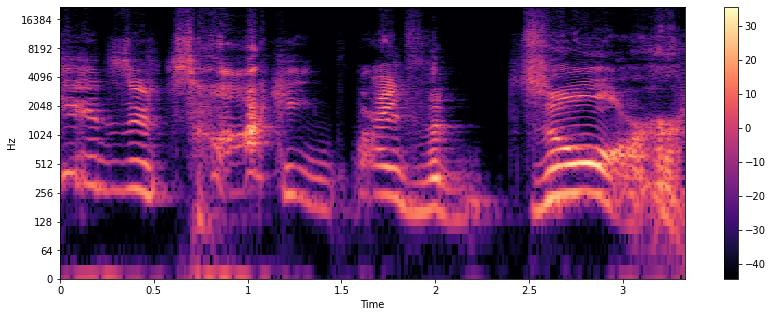

In [52]:
#display Spectrogram
print(signal.shape)
X = librosa.stft(signal_wiener) #nfft = 2048, hop_length = 512
print(X.shape)
X = librosa.amplitude_to_db(abs(X))
print(X.shape)
plt.figure(figsize=(14, 5))
# librosa.display.specshow(X, sr=torch_sr, x_axis='time', y_axis='hz')
# If to pring log of frequencies  
librosa.display.specshow(X, sr=torch_sr, x_axis='time', y_axis='log')
plt.colorbar()

/home/bryanleow/FYP/lib/python3.7/site-packages/librosa/display.py:974: MatplotlibDeprecationWarning: The 'basey' parameter of __init__() has been renamed 'base' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  scaler(mode, **kwargs)
/home/bryanleow/FYP/lib/python3.7/site-packages/librosa/display.py:974: MatplotlibDeprecationWarning: The 'linthreshy' parameter of __init__() has been renamed 'linthresh' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  scaler(mode, **kwargs)


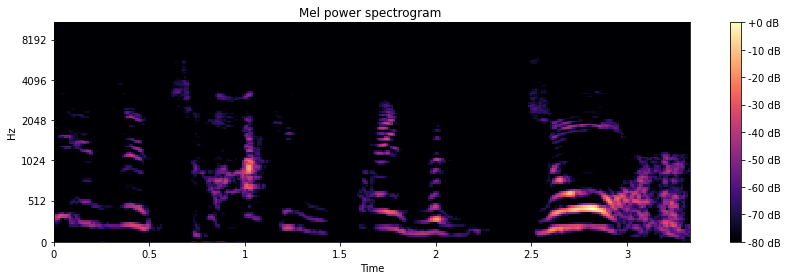

In [45]:
# Plotting Mel Power Spectrogram
S_sample = librosa.feature.melspectrogram(signal_wiener, sr=torch_sr, n_mels=128,n_fft=2048,hop_length=512)

# Convert to log scale (dB). We'll use the peak power (max) as reference.
log_S_sample = librosa.amplitude_to_db(S_sample, ref=np.max)

plt.figure(figsize=(12, 4))
librosa.display.specshow(log_S_sample, sr=torch_sr, x_axis='time', y_axis='mel')
plt.title('Mel power spectrogram ')
plt.colorbar(format='%+02.0f dB')
plt.tight_layout()

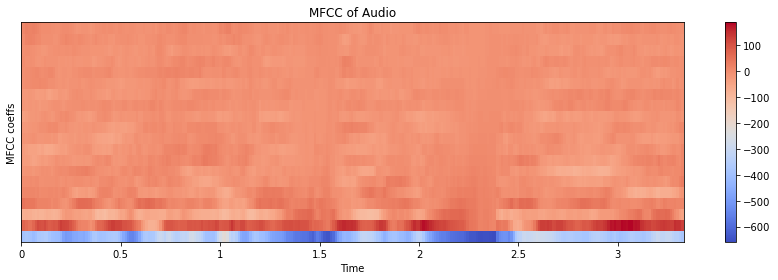

In [28]:
mfccs = librosa.feature.mfcc(signal_wiener, n_mfcc=20, n_mels=128, sr=torch_sr, n_fft=2048, hop_length= 512)

plt.figure(figsize=(12, 4))
librosa.display.specshow(mfccs, sr=torch_sr, x_axis='time')
plt.ylabel('MFCC coeffs')
plt.xlabel('Time')
plt.title('MFCC of Audio')
plt.colorbar()
plt.tight_layout()

## The noise difference

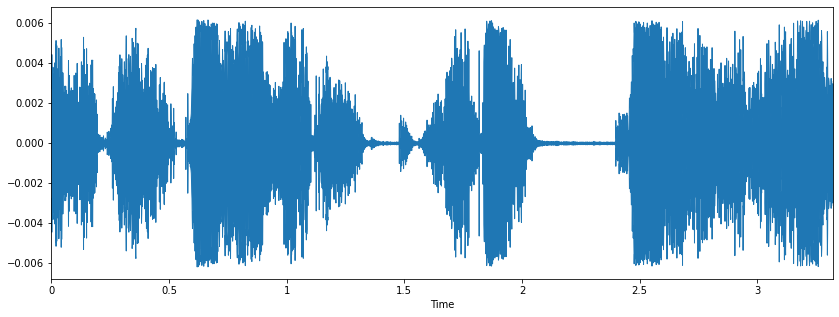

In [29]:
diff_noise = signal_wiener - trimmed_signal
plt.figure(figsize=(14, 5))
librosa.display.waveplot(diff_noise, sr=torch_sr)


In [30]:
ipd.Audio(diff_noise, rate= torch_sr)

(253053,)
(1025, 287)
(1025, 287)


/home/bryanleow/FYP/lib/python3.7/site-packages/librosa/display.py:974: MatplotlibDeprecationWarning: The 'basey' parameter of __init__() has been renamed 'base' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  scaler(mode, **kwargs)
/home/bryanleow/FYP/lib/python3.7/site-packages/librosa/display.py:974: MatplotlibDeprecationWarning: The 'linthreshy' parameter of __init__() has been renamed 'linthresh' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  scaler(mode, **kwargs)
/home/bryanleow/FYP/lib/python3.7/site-packages/librosa/display.py:974: MatplotlibDeprecationWarning: The 'linscaley' parameter of __init__() has been renamed 'linscale' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  scaler(mode, **kwargs)


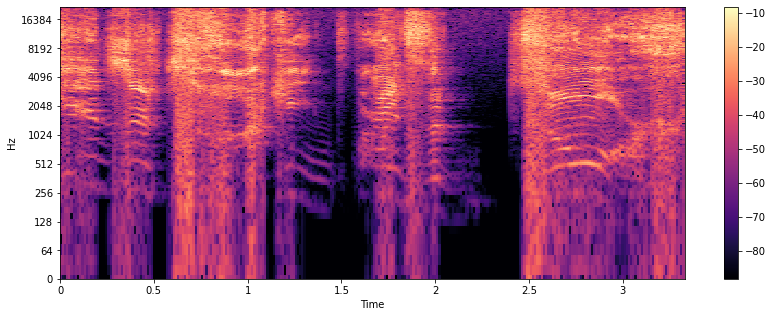

In [31]:
#display Spectrogram
print(signal.shape)
X = librosa.stft(diff_noise) #nfft = 2048, hop_length = 512
print(X.shape)
X = librosa.amplitude_to_db(abs(X))
print(X.shape)
plt.figure(figsize=(14, 5))
# librosa.display.specshow(Xdb, sr=torch_sr, x_axis='time', y_axis='hz')
# If to pring log of frequencies  
librosa.display.specshow(X, sr=torch_sr, x_axis='time', y_axis='log')
plt.colorbar()

/home/bryanleow/FYP/lib/python3.7/site-packages/librosa/display.py:974: MatplotlibDeprecationWarning: The 'basey' parameter of __init__() has been renamed 'base' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  scaler(mode, **kwargs)
/home/bryanleow/FYP/lib/python3.7/site-packages/librosa/display.py:974: MatplotlibDeprecationWarning: The 'linthreshy' parameter of __init__() has been renamed 'linthresh' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  scaler(mode, **kwargs)


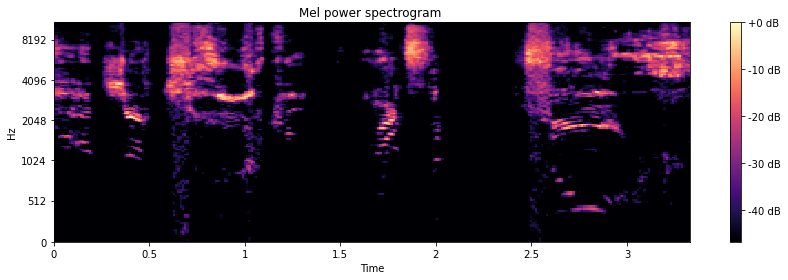

In [32]:
# Plotting Mel Power Spectrogram
S_sample = librosa.feature.melspectrogram(diff_noise, sr=torch_sr, n_mels=128,n_fft=2048,hop_length=512)

# Convert to log scale (dB). We'll use the peak power (max) as reference.
log_S_sample = librosa.amplitude_to_db(S_sample, ref=np.max)

plt.figure(figsize=(12, 4))
librosa.display.specshow(log_S_sample, sr=torch_sr, x_axis='time', y_axis='mel')
plt.title('Mel power spectrogram ')
plt.colorbar(format='%+02.0f dB')
plt.tight_layout()

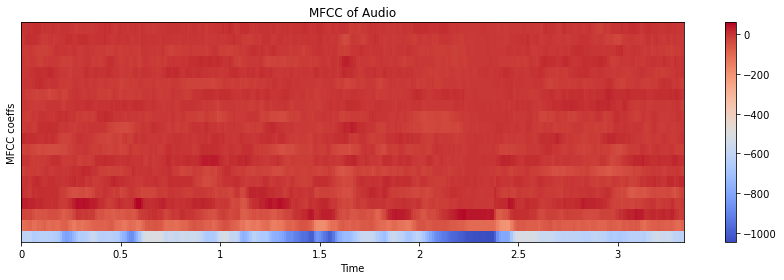

In [33]:
mfccs = librosa.feature.mfcc(diff_noise, n_mfcc=20, n_mels=128, sr=torch_sr, n_fft=2048, hop_length= 512)

plt.figure(figsize=(12, 4))
librosa.display.specshow(mfccs, sr=torch_sr, x_axis='time')
plt.ylabel('MFCC coeffs')
plt.xlabel('Time')
plt.title('MFCC of Audio')
plt.colorbar()
plt.tight_layout()